In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]=(15,5)
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [22]:
columns =['State','Account_Len','Area','Ph_No.','Int_Plan','Vmail_Plan','messgs',
            'tot_day_mins','tot_day_calls','tot_day_chrgs','tot_evening_mins',
            'tot_evening_calls','tot_evening_chrgs','tot_ngt_mins','tot_ngt_calls',
            'tot_ngt_chrgs','tot_int_mins','tot_int_calls','tot_int_chrgs',
'cust_calls_made','churn_status']
#url="http://www.dataminingconsultant.com/data/churn.txt"
Tel_Churn = pd.read_csv("E:/DataAnalyticsCourse/GittHub/Datasets/Telecom_churn/telecom_churn_data.txt",names=columns)

Tel_Churn.head()

,State,Account_Len,Area,Ph_No.,Int_Plan,Vmail_Plan,messgs,tot_day_mins,tot_day_calls,tot_day_chrgs,...,tot_evening_calls,tot_evening_chrgs,tot_ngt_mins,tot_ngt_calls,tot_ngt_chrgs,tot_int_mins,tot_int_calls,tot_int_chrgs,cust_calls_made,churn_status
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [23]:
Tel_Churn["Int_Plan"] = np.where(Tel_Churn.Int_Plan ==" yes",1,0).astype(int)
Tel_Churn["Vmail_Plan"] = np.where(Tel_Churn.Vmail_Plan ==" yes",1,0).astype(int)
Tel_Churn["churn_status"] = np.where(Tel_Churn.churn_status ==" True.",1,0).astype(int)

In [24]:
Tel_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                4617 non-null object
Account_Len          4617 non-null int64
Area                 4617 non-null int64
Ph_No.               4617 non-null object
Int_Plan             4617 non-null int32
Vmail_Plan           4617 non-null int32
messgs               4617 non-null int64
tot_day_mins         4617 non-null float64
tot_day_calls        4617 non-null int64
tot_day_chrgs        4617 non-null float64
tot_evening_mins     4617 non-null float64
tot_evening_calls    4617 non-null int64
tot_evening_chrgs    4617 non-null float64
tot_ngt_mins         4617 non-null float64
tot_ngt_calls        4617 non-null int64
tot_ngt_chrgs        4617 non-null float64
tot_int_mins         4617 non-null float64
tot_int_calls        4617 non-null int64
tot_int_chrgs        4617 non-null float64
cust_calls_made      4617 non-null int64
churn_status         4617 non-null int32
dtypes: float6

In [31]:
# Now check the unique values
print(Tel_Churn.Int_Plan.unique())
print(Tel_Churn.Vmail_Plan.unique())
print(Tel_Churn.churn_status.unique())

[0 1]
[1 0]
[0 1]


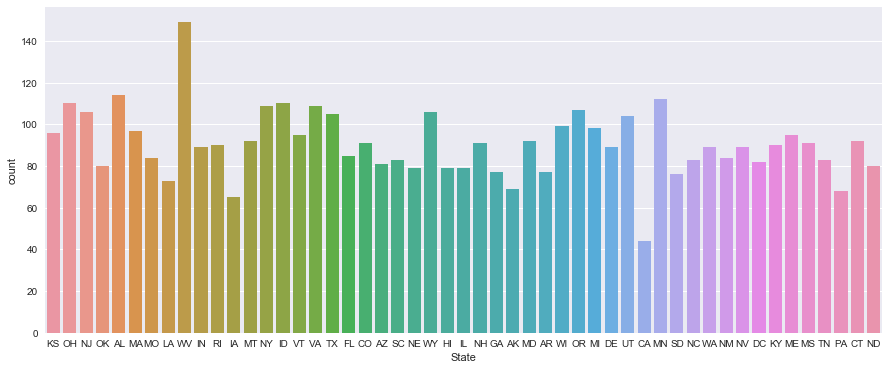

In [25]:
plt.rcParams['figure.figsize']=(15,6)
sns.countplot(x="State", data=Tel_Churn)

C:\Users\niran\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


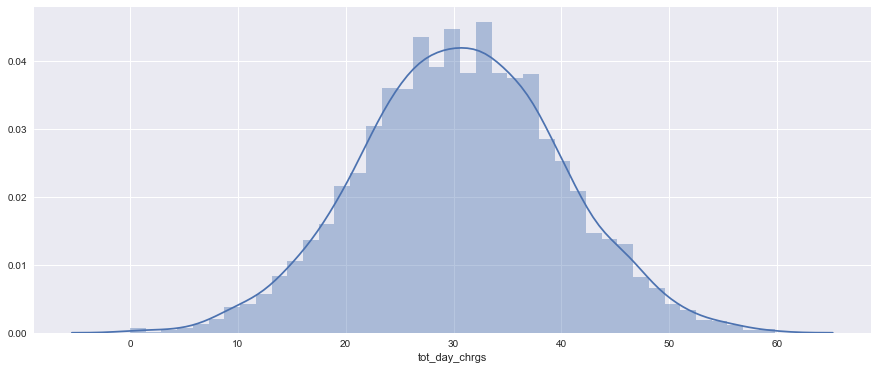

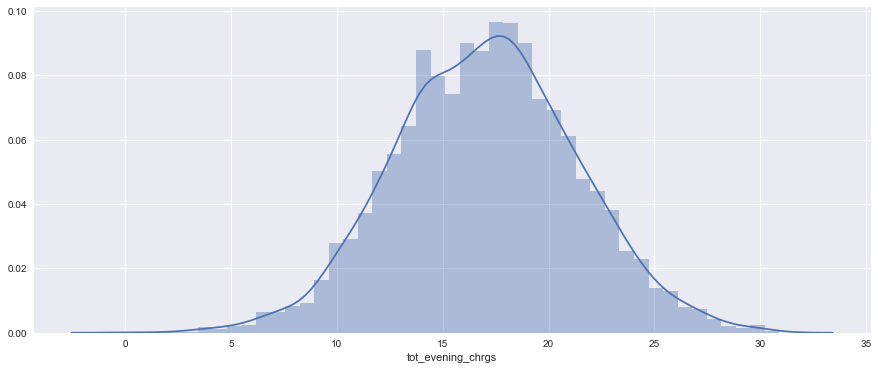

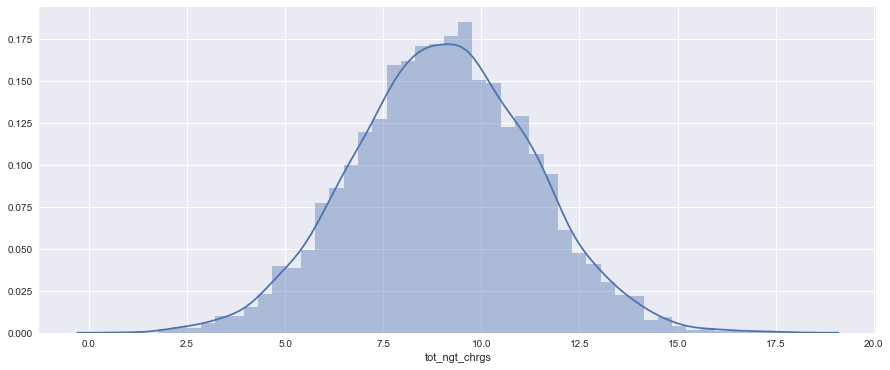

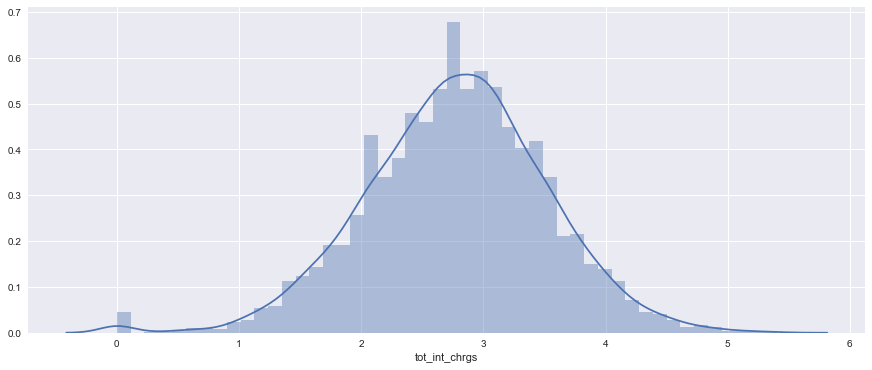

In [26]:
sns.distplot(Tel_Churn.tot_day_chrgs)
plt.show()
sns.distplot(Tel_Churn.tot_evening_chrgs)
plt.show()
sns.distplot(Tel_Churn.tot_ngt_chrgs)
plt.show()
sns.distplot(Tel_Churn.tot_int_chrgs)
plt.show()

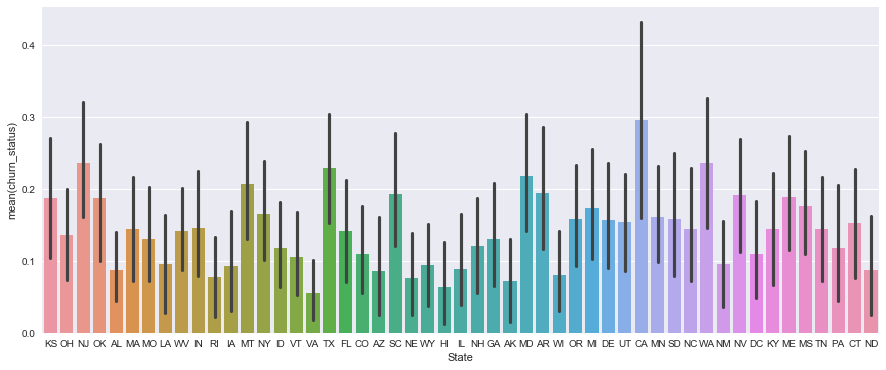

In [27]:
sns.barplot(x="State",y="churn_status" ,data=Tel_Churn)

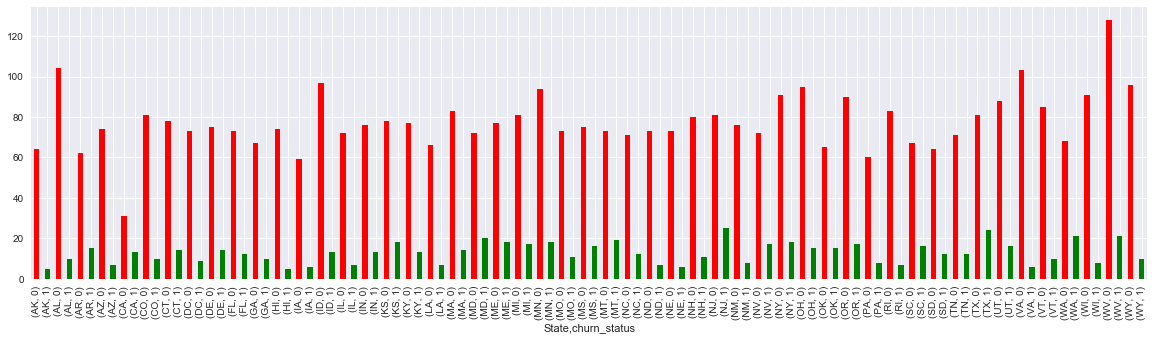

In [28]:
plt.rcParams["figure.figsize"]=(20,5)
var = Tel_Churn.groupby(["State","churn_status"]).churn_status.count()
var.plot(kind="bar",color=["red","green"])

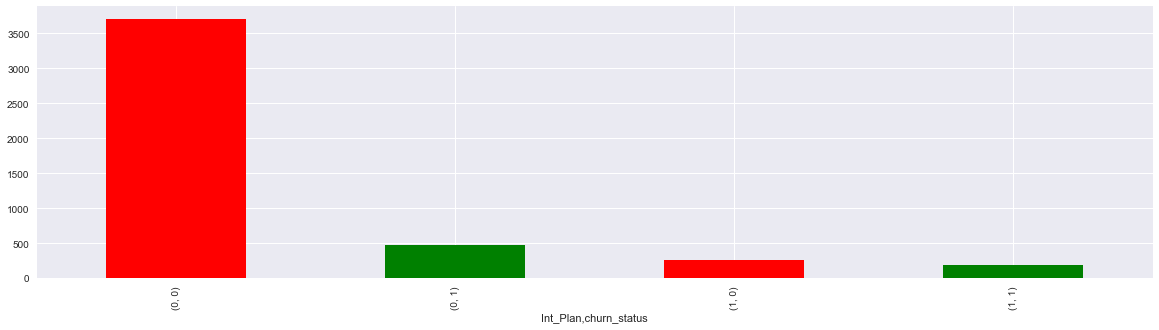

In [29]:
Int_Plan = Tel_Churn.groupby(["Int_Plan","churn_status"]).churn_status.count()
Int_Plan.plot(kind="bar",color=["red","green"])

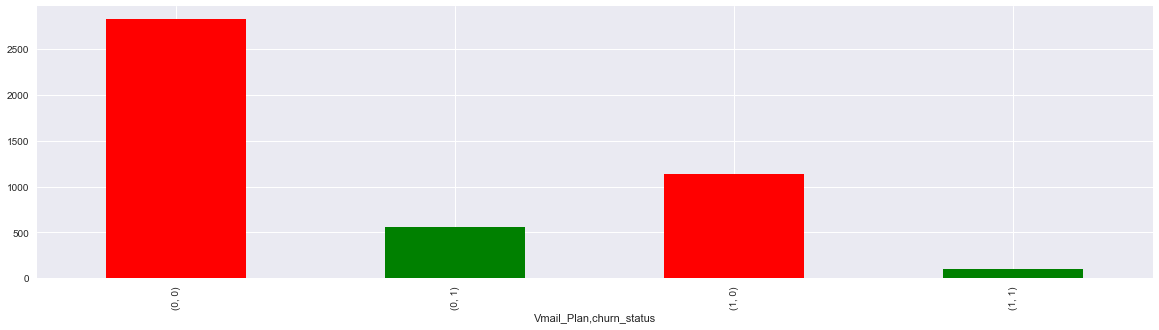

In [30]:
Vmail_Plan = Tel_Churn.groupby(["Vmail_Plan","churn_status"]).churn_status.count()
Vmail_Plan.plot(kind="bar",color=["red","green"])

In [32]:
feature_cols =['Account_Len','Area','Int_Plan','Vmail_Plan','messgs',
            'tot_day_mins','tot_day_calls','tot_day_chrgs','tot_evening_mins',
            'tot_evening_calls','tot_evening_chrgs','tot_ngt_mins','tot_ngt_calls',
            'tot_ngt_chrgs','tot_int_mins','tot_int_calls','tot_int_chrgs',
'cust_calls_made']

X = Tel_Churn[feature_cols]
y = Tel_Churn.churn_status

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=45)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3693, 18)
(924, 18)
(3693,)
(924,)


# Perform Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
logreg_pred = logreg.predict(xtest)

Model_log = round(logreg.score(xtrain,ytrain)*100,2)
print("Model Score : " ,Model_log)
Acc_log = accuracy_score(logreg_pred,ytest)
print("Acc_Score : ", Acc_log)

from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(ytest,logreg_pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')


from sklearn.cross_validation import cross_val_score
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy') #fitting logistic regression to whole data with 5 fold
print("Log:",scores)
print("Log:" ,scores.mean())


# Perform Decision Tree

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)

tree.fit(xtrain,ytrain)
tree_Pred = tree.predict(xtest).astype(int)



Model_tree = round(tree.score(xtrain,ytrain)*100,2)
print("Model Score : " ,Model_tree)
Acc_tree = accuracy_score(tree_Pred,ytest,normalize=True)
print("Acc_Score : ", Acc_tree)

#Confusion Metrix 

from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(ytest,tree_Pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Cross-Validation
scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy') #fitting Decision Tree to whole data with 5 fold
print("Log:",scores)
print("Log:" ,scores.mean())

# Random Forest Tree

Model Score :  89.2
Acc_Score :  0.878787878788
Log: [ 0.88648649  0.87757313  0.88624052  0.88190683  0.88624052]
Log: 0.883689496647


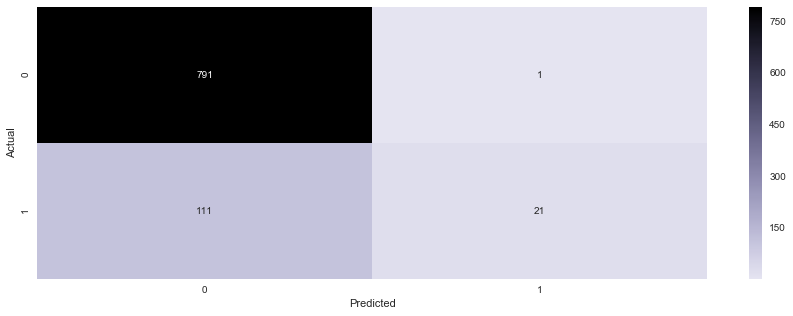

In [39]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 200, random_state = 1)

forest.fit(xtrain,ytrain)
forest_Pred = forest.predict(xtest).astype(int)

Model_forest = round(forest.score(xtrain,ytrain)*100,2)
print("Model Score : " ,Model_forest)
Acc_forest = metrics.accuracy_score(forest_Pred,ytest,normalize=True)
print("Acc_Score : ", Acc_forest)

#Confusion Metrix 

from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(ytest,forest_Pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')


#Cross Validation
# Cross-Validation
scores = cross_val_score(forest, X, y, cv=5, scoring='accuracy') #fitting Decision Tree to whole data with 5 fold
print("Log:",scores)
print("Log:" ,scores.mean())